In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
Ames_housing = pd.read_csv('/content/drive/MyDrive/Master_ML_From_Zero_To_Hero/Data/AmesHousing.csv')

In [4]:
Ames_housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
Ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
Ames_housing.columns.value_counts()

,count
Order,1
PID,1
MS SubClass,1
MS Zoning,1
Lot Frontage,1
...,...
Mo Sold,1
Yr Sold,1
Sale Type,1
Sale Condition,1


In [7]:
Ames_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [8]:
Ames_housing.isnull().sum().sort_values(ascending=False).head(20)

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Yr Blt,159
Garage Cond,159


In [9]:
len(Ames_housing["Pool QC"])

2930

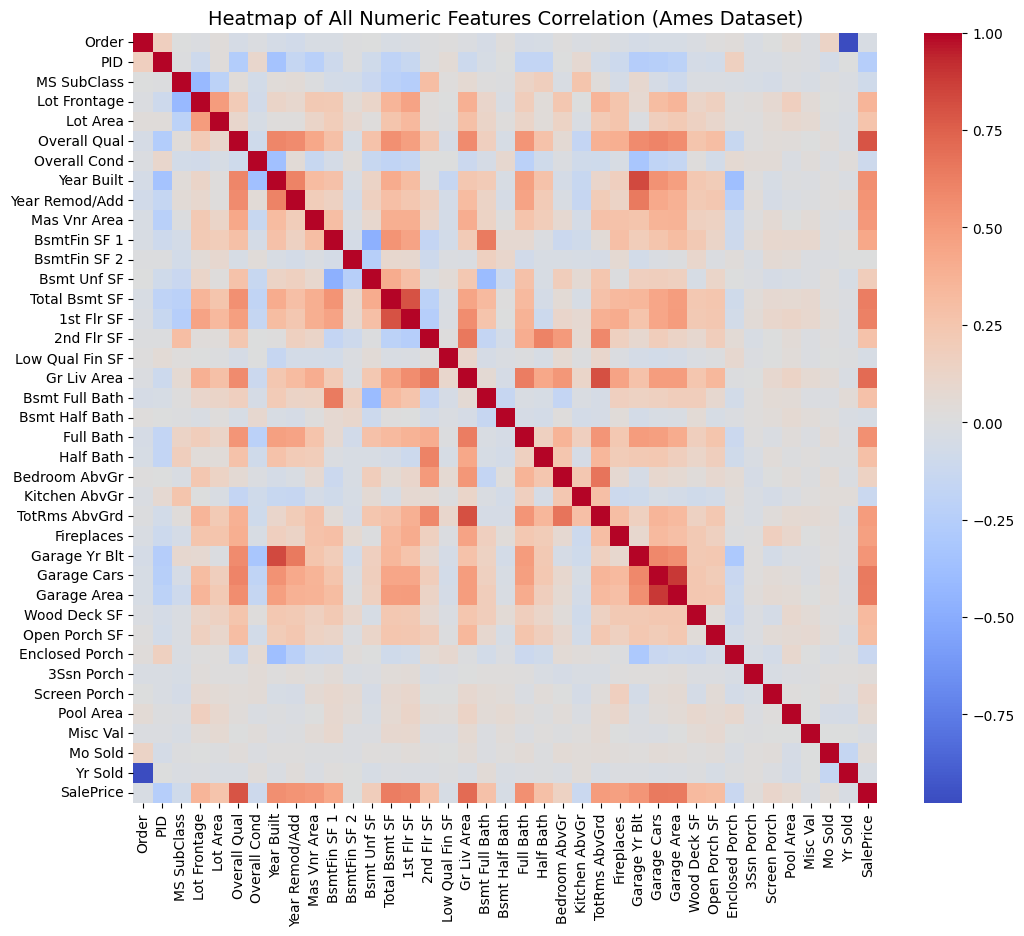

,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


In [10]:
numeric_Ames = Ames_housing.select_dtypes(include=[np.number])


corr_matrix = numeric_Ames.corr()


corr_with_target = corr_matrix["SalePrice"].sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=True)
plt.title("Heatmap of All Numeric Features Correlation (Ames Dataset)", fontsize=14)
plt.show()


corr_with_target


In [11]:

numeric_Ames = Ames_housing.select_dtypes(include=[np.number])
corr_with_target = numeric_Ames.corr()['SalePrice']

thresholds = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
results = []

print("Testing multiple correlation thresholds...\n")

for thr in thresholds:
    selected_features = corr_with_target[abs(corr_with_target) >= thr].index.tolist()

    temp_df = Ames_housing[selected_features + [col for col in Ames_housing.columns if col not in numeric_Ames.columns]]
    temp_df = pd.get_dummies(temp_df, drop_first=True)

    X = temp_df.drop('SalePrice', axis=1)
    y = temp_df['SalePrice']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42, n_estimators=150)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    results.append((thr, len(selected_features), r2))
    print(f"Threshold={thr:.2f} → Features={len(selected_features):3d} → R2={r2:.4f}")

res_df = pd.DataFrame(results, columns=['Threshold', 'NumFeatures', 'R2'])


Testing multiple correlation thresholds...

Threshold=0.01 → Features= 38 → R2=0.9123
Threshold=0.05 → Features= 31 → R2=0.9133
Threshold=0.10 → Features= 29 → R2=0.9138
Threshold=0.15 → Features= 24 → R2=0.9151
Threshold=0.20 → Features= 23 → R2=0.9100
Threshold=0.25 → Features= 22 → R2=0.9159
Threshold=0.30 → Features= 18 → R2=0.9077
Threshold=0.35 → Features= 16 → R2=0.9059
Threshold=0.40 → Features= 15 → R2=0.9026


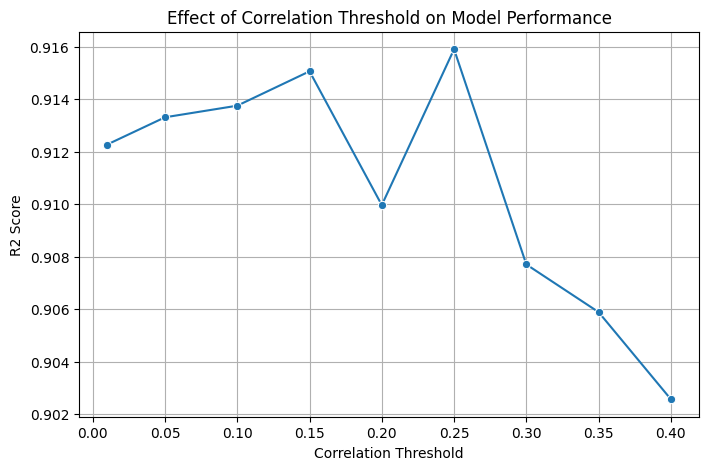


Best threshold = 0.25 with R2 = 0.9159 and 22 features


In [12]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Threshold', y='R2', data=res_df, marker='o')
plt.title("Effect of Correlation Threshold on Model Performance")
plt.xlabel("Correlation Threshold")
plt.ylabel("R2 Score")
plt.grid(True)
plt.show()

best_thr = res_df.loc[res_df['R2'].idxmax()]
print(f"\nBest threshold = {best_thr['Threshold']} with R2 = {best_thr['R2']:.4f} and {int(best_thr['NumFeatures'])} features")



Best threshold: 0.25
Number of important features: 22
Important features:
 ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice']


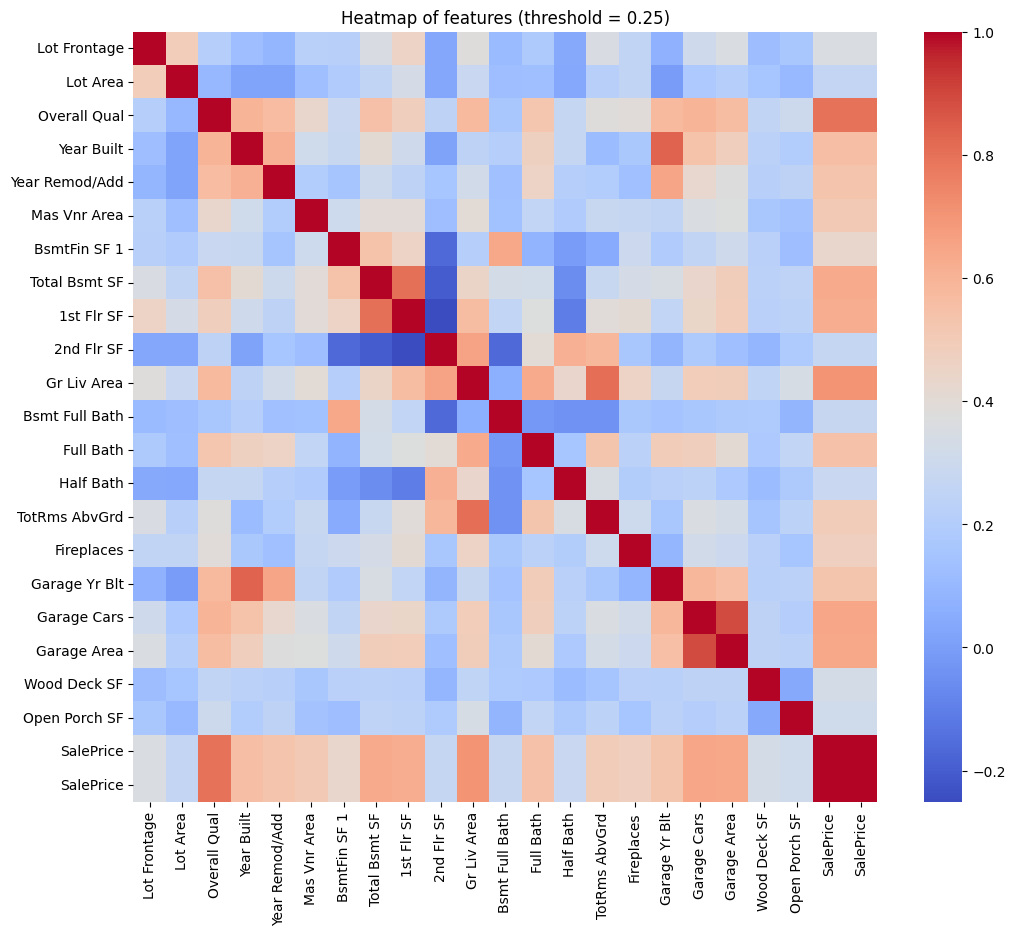

In [13]:
best_threshold = 0.25
important_features = corr_with_target[abs(corr_with_target) >= best_threshold].index.tolist()

print(f"\nBest threshold: {best_threshold}")
print(f"Number of important features: {len(important_features)}")
print("Important features:\n", important_features)

Ames_filtered = Ames_housing[important_features + ['SalePrice']]

plt.figure(figsize=(12,10))
sns.heatmap(Ames_filtered.corr(), annot=False, cmap='coolwarm')
plt.title(f"Heatmap of features (threshold = {best_threshold})")
plt.show()

In [14]:
print(important_features)

['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice']


In [16]:
important_features = [
    'Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add',
    'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
    'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd',
    'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
    'Wood Deck SF', 'Open Porch SF', 'SalePrice'
]

In [17]:
len(important_features)

22

In [18]:
Ames_housing[important_features].isna().sum()

,0
Lot Frontage,490
Lot Area,0
Overall Qual,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,23
BsmtFin SF 1,1
Total Bsmt SF,1
1st Flr SF,0
2nd Flr SF,0


In [20]:
Ames_housing["Lot Frontage"].fillna(Ames_housing["Lot Frontage"].mean(), inplace=True)
Ames_housing["Mas Vnr Area"].fillna(Ames_housing["Mas Vnr Area"].mean(), inplace=True)
Ames_housing["Garage Yr Blt"].fillna(Ames_housing["Garage Yr Blt"].mean(), inplace=True)
Ames_housing["Garage Cars"].fillna(Ames_housing["Garage Cars"].mean(), inplace=True)
Ames_housing["Garage Area"].fillna(Ames_housing["Garage Area"].mean(), inplace=True)
Ames_housing["Bsmt Full Bath"].fillna(Ames_housing["Bsmt Full Bath"].mean(), inplace=True)
Ames_housing["BsmtFin SF 1"].fillna(Ames_housing["BsmtFin SF 1"].mean(), inplace=True)
Ames_housing["Total Bsmt SF"].fillna(Ames_housing["Total Bsmt SF"].mean(), inplace=True)

/tmp/ipython-input-2307103537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ames_housing["Lot Frontage"].fillna(Ames_housing["Lot Frontage"].mean(), inplace=True)
/tmp/ipython-input-2307103537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [21]:
Ames_housing[important_features].isna().sum()

,0
Lot Frontage,0
Lot Area,0
Overall Qual,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,0
BsmtFin SF 1,0
Total Bsmt SF,0
1st Flr SF,0
2nd Flr SF,0


In [22]:

X = Ames_housing[important_features]
y = Ames_housing['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("\nFinal Model Performance")
print(f"R2 Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")




Final Model Performance
R2 Score: 1.000
MAE: 279.444


In [23]:
Ames_housing[important_features]

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,...,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,141.00000,31770,6,1960,1960,112.0,639.0,1080.0,1656,0,...,1,0,7,2,1960.000000,2.0,528.0,210,62,215000
1,80.00000,11622,5,1961,1961,0.0,468.0,882.0,896,0,...,1,0,5,0,1961.000000,1.0,730.0,140,0,105000
2,81.00000,14267,6,1958,1958,108.0,923.0,1329.0,1329,0,...,1,1,6,0,1958.000000,1.0,312.0,393,36,172000
3,93.00000,11160,7,1968,1968,0.0,1065.0,2110.0,2110,0,...,2,1,8,2,1968.000000,2.0,522.0,0,0,244000
4,74.00000,13830,5,1997,1998,0.0,791.0,928.0,928,701,...,2,1,6,1,1997.000000,2.0,482.0,212,34,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.00000,7937,6,1984,1984,0.0,819.0,1003.0,1003,0,...,1,0,6,0,1984.000000,2.0,588.0,120,0,142500
2926,69.22459,8885,5,1983,1983,0.0,301.0,864.0,902,0,...,1,0,5,0,1983.000000,2.0,484.0,164,0,131000
2927,62.00000,10441,5,1992,1992,0.0,337.0,912.0,970,0,...,1,0,6,0,1978.132443,0.0,0.0,80,32,132000
2928,77.00000,10010,5,1974,1975,0.0,1071.0,1389.0,1389,0,...,1,0,6,1,1975.000000,2.0,418.0,240,38,170000


##**Classification**

In [24]:
Adult_incom = pd.read_csv('/content/drive/MyDrive/Master_ML_From_Zero_To_Hero/Data/adult.csv')

In [25]:
Adult_incom

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
(Adult_incom == '?').sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [28]:
import numpy as np

Adult_incom_2 = Adult_incom.replace('?', np.nan)

In [29]:
Adult_incom_2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
(Adult_incom_2 == '?').sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [31]:
Adult_incom_2.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [35]:
Adult_incom_2["workclass"]

,workclass
0,Private
1,Private
2,Local-gov
3,Private
4,NaN
...,...
48837,Private
48838,Private
48839,Private
48840,Private


In [34]:
Adult_incom_2["occupation"]

,occupation
0,Machine-op-inspct
1,Farming-fishing
2,Protective-serv
3,Machine-op-inspct
4,NaN
...,...
48837,Tech-support
48838,Machine-op-inspct
48839,Adm-clerical
48840,Adm-clerical


In [37]:
Adult_incom_2["native-country"]

,native-country
0,United-States
1,United-States
2,United-States
3,United-States
4,United-States
...,...
48837,United-States
48838,United-States
48839,United-States
48840,United-States


In [39]:
for col in ['workclass', 'occupation', 'native-country']:
    Adult_incom_2[col].fillna(Adult_incom_2[col].mode()[0], inplace=True)

In [40]:
Adult_incom_2[['workclass', 'occupation', 'native-country']].isna().sum()

,0
workclass,0
occupation,0
native-country,0


In [41]:
Adult_incom_2.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [47]:
Adult_incom_2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    StackingClassifier
)

In [49]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [50]:
le = LabelEncoder()
Adult_incom_2['income'] = le.fit_transform(Adult_incom_2['income'])

In [56]:
X = pd.get_dummies(Adult_incom_2.drop('income', axis=1), drop_first=True, dtype='int')
y = Adult_incom_2['income']

In [57]:
y

,income
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [58]:
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
bagging_model = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=10,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)
bag_acc = accuracy_score(y_test, y_pred_bag)
print("Accuracy:", bag_acc)

Accuracy: 0.8657999795270754


In [61]:
adaboost_model = AdaBoostClassifier(
    n_estimators=200, learning_rate=0.1, random_state=42
)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)
ada_acc = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", ada_acc)

AdaBoost Accuracy: 0.8482956290306071


In [62]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.8806428498310984


In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=150, learning_rate=0.1, random_state=42, eval_metric='logloss'))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,
    n_jobs=-1
)
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
stack_acc = accuracy_score(y_test, y_pred_stack)
print("Stacking Accuracy:", stack_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Accuracy: 0.8737844201044119


In [66]:
from sklearn.metrics import classification_report

In [71]:
classification_report_dict = classification_report(y_test, y_pred_stack, output_dict=True)
pd.DataFrame(classification_report_dict)

,0,1,accuracy,macro avg,weighted avg
precision,0.897126,0.777428,0.873784,0.837277,0.869067
recall,0.943308,0.646725,0.873784,0.795016,0.873784
f1-score,0.919638,0.706079,0.873784,0.812858,0.869576
support,7479.000000,2290.000000,0.873784,9769.000000,9769.000000


In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [93]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

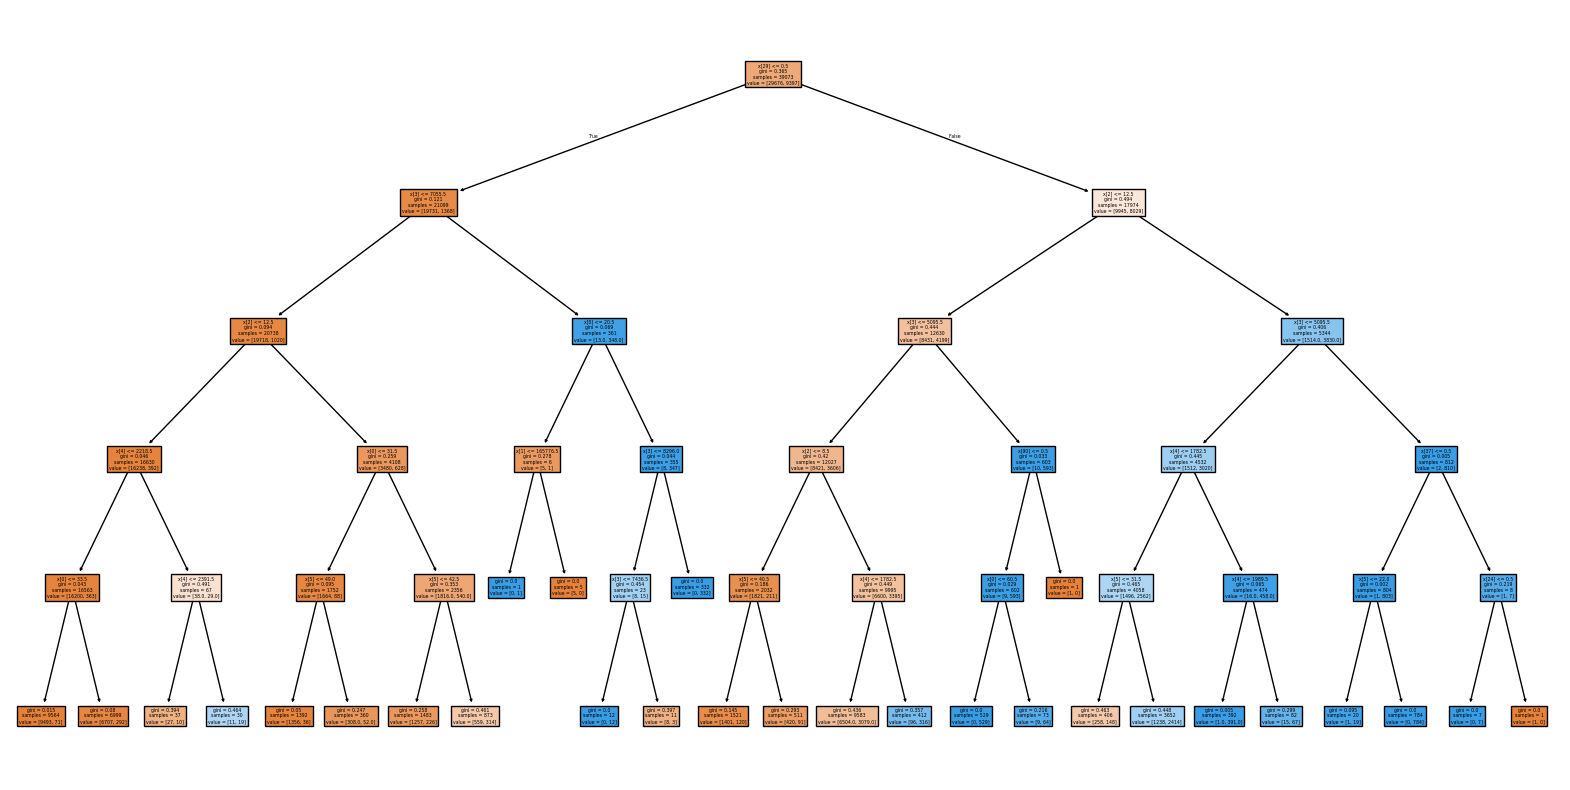

In [94]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()